<div style="background-color:	#216375 ; text-align:center; vertical-align: middle; padding:40px 0; margin-top:30px">
<h1 style="color:black"> Generative AI: Portfolio </h1>
<b style="color:white"> Julia Boschman, Daan Eising</b>
    </div>

<a name='start'></a>

## Table of contents

1. [H1: Inleiding](#1.0)
2. [H2: EDA](#2.0)
    - [&sect;2.1: Audio fragmenten](#2.1)
    - [&sect;2.2: Eigenschappen audio fragmenten](#2.2)
    - [&sect;2.3: Songteksten](#2.3)
    - [&sect;2.4: Conclusie EDA](#2.4)
9. [H3: Literatuurlijst](#3.0)

[Back to the top](#start)
<a name='1.0'></a>

<div style="background-color:#216375; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>H1: Inleiding</strong></h2>
</div>

<a name='1.1'></a>
<h3>&sect;1.1: Imports</h3>

In [2]:
import os
import numpy as np
from PIL import Image
import math
import matplotlib.pyplot as plt
import tensorflow as tf
import time
from tqdm import tqdm

[Back to the top](#start)
<a name='2.0'></a>

<div style="background-color:#216375; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>H2: Dataset</strong></h2>
</div>

### Let op: Er staan hieronder twee cellen code waarvan je er maar eentje hoeft te runnen. Het verschil zit er in of je de afbeeldingen al hebt ge-resized of niet. Kijk dus even goed welke je moet pakken. Daarnaast wordt er meerdere keren dataset_128 gebruikt, omdat ik de kleinere dimensie gebruik. Als je andere data gebruikt, pas de plekken waar dataset_128 staat dan aan naar de naam die jij de afbeeldingen hebt gegeven.

Voor het aanmaken van een nieuwe map, gebruik deze code!

In [ ]:
IMAGE_DIR = "Baroque"
SAVE_DIR = "Processed_Baroque_32"

# Grootte van de afbeeldingen
IMG_SIZE = (32, 32)
os.makedirs(SAVE_DIR, exist_ok=True)

# Functie om afbeeldingen te laden, resizen en op te slaan
def preprocess_and_save_images(image_dir, save_dir, img_size):
    """
    Laadt afbeeldingen, schaalt ze naar 128x128 en slaat ze op in een nieuwe map.

    :param image_dir: Map met originele afbeeldingen.
    :param save_dir: Map om de voorbewerkte afbeeldingen op te slaan.
    :param img_size: Gewenste grootte van de afbeeldingen.
    :return: NumPy-array met voorbewerkte afbeeldingen.
    """
    images = []
    print(f"Start met laden en preprocessen van afbeeldingen uit {image_dir}...")

    for i, filename in enumerate(os.listdir(image_dir)):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            img_path = os.path.join(image_dir, filename)
            img = Image.open(img_path).convert("RGB")
            img = img.resize(img_size)  # Rescale naar 128x128
            img_array = np.array(img) / 127.5 - 1  # Normaliseren naar [-1, 1]
            images.append(img_array)

            # Opslaan van de bewerkte afbeelding in de nieuwe map
            save_path = os.path.join(save_dir, f"baroque_{i:04d}.png")
            img_pil = Image.fromarray(((img_array + 1) * 127.5).astype(np.uint8))  # Terug naar [0,255] voor opslag
            img_pil.save(save_path)

    images_np = np.array(images)
    print(f"{len(images_np)} afbeeldingen verwerkt en opgeslagen in {save_dir}!")
    
    return images_np

dataset_128 = preprocess_and_save_images(IMAGE_DIR, SAVE_DIR, IMG_SIZE)
print(f"Dataset geladen met vorm: {dataset_128.shape}")

Start met laden en preprocessen van afbeeldingen uit Baroque...
4240 afbeeldingen verwerkt en opgeslagen in Processed_Baroque_32!
Dataset geladen met vorm: (4240, 32, 32, 3)


Voor het inlezen van de afbeeldingen uit een bestaande map, gebruik onderstaande code!

In [3]:
# Functie om afbeeldingen uit een map te laden als NumPy-array
def load_images_from_folder(image_dir):
    """
    Laadt alle afbeeldingen uit een map en converteert ze naar een genormaliseerde NumPy-array.
    
    :param image_dir: Pad naar de map met opgeslagen afbeeldingen.
    :return: NumPy-array met afbeeldingen (genormaliseerd naar [-1, 1])
    """
    images = []
    for filename in sorted(os.listdir(image_dir)):  # Zorgt voor juiste volgorde
        if filename.endswith('.png') or filename.endswith('.jpg'):
            img_path = os.path.join(image_dir, filename)
            img = Image.open(img_path).convert("RGB")
            img_array = np.array(img) / 127.5 - 1  # Normaliseren naar [-1, 1]
            images.append(img_array)

    images_np = np.array(images)
    print(f"{len(images_np)} afbeeldingen geladen uit {image_dir}!")
    return images_np

dataset_128 = load_images_from_folder("Processed_Baroque_32")

4240 afbeeldingen geladen uit Processed_Baroque_32!


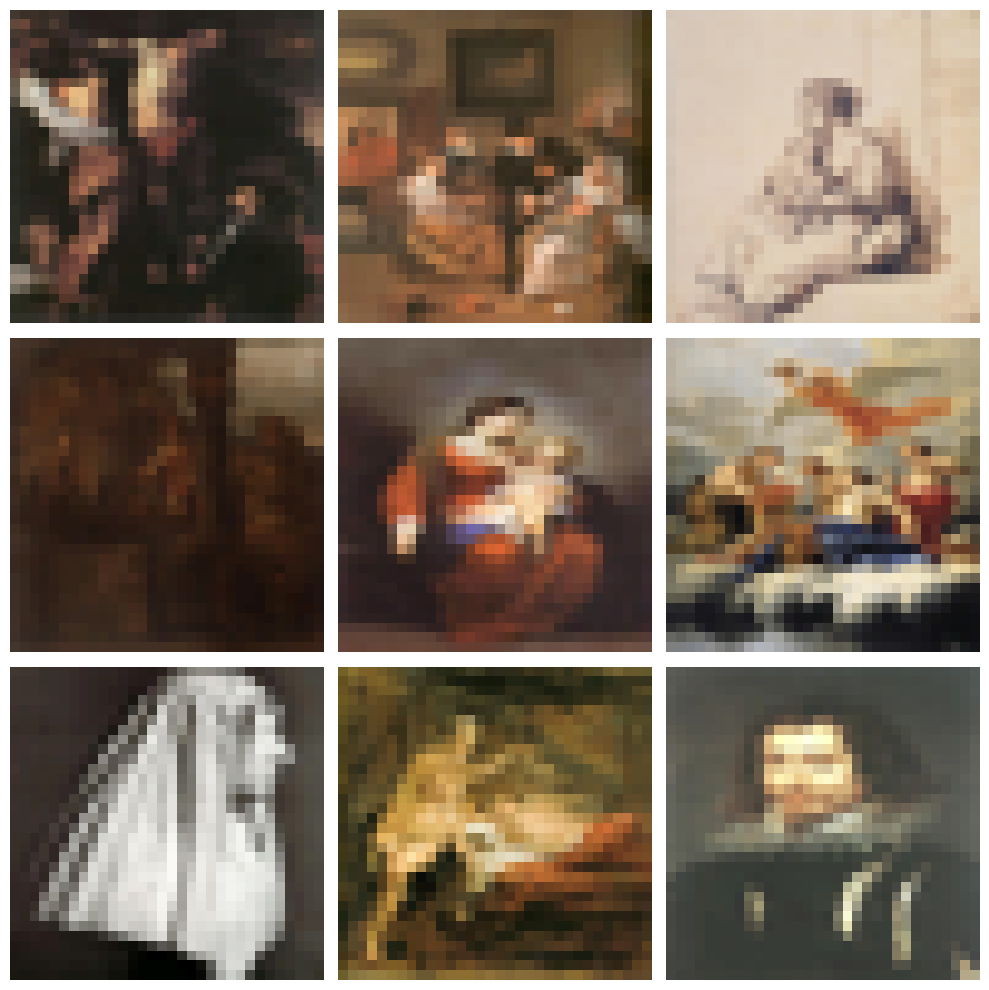

In [ ]:
# Functie om willekeurige afbeeldingen uit de dataset te visualiseren
def show_images(dataset, num_images=9):
    """
    Toont een aantal willekeurige afbeeldingen uit de dataset in een raster.
    
    :param dataset: np.array van afbeeldingen met vorm (aantal, 256, 256, 3)
    :param num_images: Aantal afbeeldingen om te tonen (moet een kwadraatgetal zijn, bijv. 4, 9, 16)
    """
    num_cols = int(np.sqrt(num_images))  # Raster met even aantal kolommen en rijen
    num_rows = int(np.ceil(num_images / num_cols))

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
    axes = axes.flatten()  # Maakt een lijst van subplot assen
    
    indices = np.random.choice(len(dataset), num_images, replace=False)  # Willekeurige indices
    
    for i, idx in enumerate(indices):
        img = (dataset[idx] + 1) / 2  # Terugschalen naar [0, 1] voor correcte weergave
        axes[i].imshow(img)
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()

show_images(dataset_128, num_images=9)

[Back to the top](#start)
<a name='3.0'></a>

<div style="background-color:#216375; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>H3: Nieuwe manier van trainen</strong></h2>
</div>

In [5]:
# Parameters van het diffusion proces
T = 250
beta = np.linspace(1e-4, 0.02, T)
alpha = 1 - beta
alpha_bar = np.cumprod(alpha)

In [6]:
def forward_diffusion(x0, t, noise):
    sqrt_alpha_bar_t = np.float32(math.sqrt(alpha_bar[t]))
    sqrt_one_minus_alpha_bar_t = np.float32(math.sqrt(1 - alpha_bar[t]))
    return sqrt_alpha_bar_t * x0 + sqrt_one_minus_alpha_bar_t * noise

In [7]:
def get_t_embedding(t, dim):
    # Normalize the timestep and convert to an array.
    t = np.array([t], dtype=np.float32)
    t = t / T
    pe = np.zeros(dim, dtype=np.float32)
    
    # Use t[0] because math.sin and math.cos require scalar inputs.
    for i in range(0, dim, 2):
        pe[i] = math.sin(t[0] * (10000 ** (-i / dim)))
        if i + 1 < dim:
            pe[i + 1] = math.cos(t[0] * (10000 ** (-i / dim)))
    
    return pe

In [8]:
def layer_norm(x, eps=1e-5):
    """
    Apply layer normalization over the last dimension.
    """
    mean, variance = tf.nn.moments(x, axes=[1], keepdims=True)
    return (x - mean) / tf.sqrt(variance + eps)

In [9]:
class DiffusionModel:
    def __init__(self, input_dim, t_embed_dim, hidden_dims, output_dim):
        """
        input_dim: Dimension of the flattened image (e.g. for 128x128x3, input_dim = 49152)
        t_embed_dim: Dimension for time embedding to be appended (e.g. 16)
        hidden_dims: List of hidden dimensions for each layer (e.g. [512, 1024, 512])
        output_dim: Dimension of the output (should equal input_dim)
        """
        # The first layer takes the concatenated [flattened image, time_embedding]
        self.W1 = tf.Variable(np.random.randn(input_dim + t_embed_dim, hidden_dims[0]) * 0.001, dtype=np.float32)
        self.b1 = tf.Variable(np.zeros((1, hidden_dims[0]), dtype=np.float32))
        
        self.W2 = tf.Variable(np.random.randn(hidden_dims[0], hidden_dims[1]) * 0.001, dtype=np.float32)
        self.b2 = tf.Variable(np.zeros((1, hidden_dims[1]), dtype=np.float32))
        
        self.W3 = tf.Variable(np.random.randn(hidden_dims[1], hidden_dims[2]) * 0.001, dtype=np.float32)
        self.b3 = tf.Variable(np.zeros((1, hidden_dims[2]), dtype=np.float32))
        
        self.W4 = tf.Variable(np.random.randn(hidden_dims[2], output_dim) * 0.001, dtype=np.float32)
        self.b4 = tf.Variable(np.zeros((1, output_dim), dtype=np.float32))
    
    def __call__(self, x_t, t):
        batch_size = tf.shape(x_t)[0]
        # Ensure the input is float32
        x_t = tf.cast(x_t, tf.float32)
        x_t_flat = tf.cast(tf.reshape(x_t, [batch_size, -1]), tf.float32)

        t_embed_dim = int(self.W1.shape[0]) - int(x_t_flat.shape[1])
        t_emb = tf.convert_to_tensor(get_t_embedding(t, t_embed_dim), dtype=tf.float32)
        t_emb = tf.tile(tf.expand_dims(t_emb, 0), [batch_size, 1])

        inp = tf.concat([x_t_flat, t_emb], axis=1)
        
        # Layer 1: Linear -> LayerNorm -> LeakyReLU
        h1 = tf.matmul(inp, self.W1) + self.b1
        h1 = layer_norm(h1)
        h1 = tf.nn.leaky_relu(h1, alpha=0.2)
        
        # Layer 2: Linear -> LayerNorm -> LeakyReLU
        h2 = tf.matmul(h1, self.W2) + self.b2
        h2 = layer_norm(h2)
        h2 = tf.nn.leaky_relu(h2, alpha=0.2)
        # Residual connection from h1 to h2 if dimensions match
        if h1.shape[-1] == h2.shape[-1]:
            h2 = h2 + h1
        
        # Layer 3: Linear -> LayerNorm -> LeakyReLU
        h3 = tf.matmul(h2, self.W3) + self.b3
        h3 = layer_norm(h3)
        h3 = tf.nn.leaky_relu(h3, alpha=0.2)
        # Residual connection from h2 to h3 if dimensions match
        if h2.shape[-1] == h3.shape[-1]:
            h3 = h3 + h2
        
        # Output layer (predict noise)
        output = tf.matmul(h3, self.W4) + self.b4
        return output

In [10]:
def get_batches(data, batch_size):
    np.random.shuffle(data)
    for i in range(0, len(data), batch_size):
        yield data[i:i+batch_size]

In [11]:
def train_diffusion_model(model, data, epochs, batch_size):
    optimizer = tf.optimizers.Adam(learning_rate=1e-4)
    losses = []
    total_batches = int(np.ceil(len(data) / batch_size))
    
    for epoch in range(epochs):
        start_time = time.time()
        total_loss = 0
        num_batches = 0
        avg_gradients = []
        print(f"Starting Epoch {epoch+1}/{epochs}", flush=True)
        
        # Wrap the batch generator with tqdm for a progress bar.
        for batch in tqdm(get_batches(data, batch_size), total=total_batches, desc=f"Epoch {epoch+1}/{epochs}"):
            t = np.random.randint(1, T)  # Random timestep
            noise = np.random.randn(*batch.shape).astype(np.float32)
            x_t = forward_diffusion(batch, t, noise)
            
            with tf.GradientTape() as tape:
                epsilon_pred = model(x_t, t)
                loss = tf.reduce_mean(tf.square(noise - epsilon_pred))
            
            grads = tape.gradient(loss, [model.W1, model.b1, model.W2, model.b2,
                                          model.W3, model.b3, model.W4, model.b4])
            optimizer.apply_gradients(zip(grads, [model.W1, model.b1, model.W2, model.b2,
                                                  model.W3, model.b3, model.W4, model.b4]))
            total_loss += loss.numpy()
            num_batches += 1
            avg_gradients.append([tf.reduce_mean(tf.abs(g)).numpy() for g in grads if g is not None])
        
        epoch_loss = total_loss / num_batches
        losses.append(epoch_loss)
        epoch_time = time.time() - start_time
        avg_grad_values = np.mean(avg_gradients, axis=0)
        print(f"Epoch {epoch+1}/{epochs} - Loss: {epoch_loss:.6f} - Time: {epoch_time:.2f}s", flush=True)
        print(f"Average gradients: {avg_grad_values}", flush=True)
    
    print("Training completed!", flush=True)
    return losses

In [12]:
def sample(model, shape):
    """
    Generate new samples by performing the reverse diffusion process.
    shape: (batch_size, height, width, channels)
    """
    x = np.random.randn(*shape).astype(np.float32)  # Start with pure noise
    
    for t in reversed(range(1, T)):
        epsilon_pred = model(tf.convert_to_tensor(x), t)
        # Reshape prediction back to the image shape if necessary
        epsilon_pred = epsilon_pred.numpy().reshape(shape)
        
        sqrt_alpha_t = math.sqrt(alpha[t])
        beta_t = beta[t]
        sqrt_one_minus_alpha_bar_t = math.sqrt(1 - alpha_bar[t])
        mu = (1 / sqrt_alpha_t) * (x - (beta_t / sqrt_one_minus_alpha_bar_t) * epsilon_pred)
        
        if t > 1:
            noise = np.random.randn(*x.shape).astype(np.float32) * math.sqrt(beta_t)
        else:
            noise = 0
        x = mu + noise
    
    # Rescale from [-1,1] to [0,255]
    x = np.clip((x + 1) * 127.5, 0, 255).astype(np.uint8)
    return x

In [13]:
def compare_generated_vs_real(generated_samples, real_samples, num_images=5, cmap=None):
    """
    Display a side-by-side comparison of generated vs. real images.
    
    Parameters:
    - generated_samples: list or array of generated images.
    - real_samples: list or array of real images.
    - num_images: number of images to display from each.
    - cmap: colormap to use for imshow (e.g., 'gray' for grayscale images).
    """
    num_images = min(num_images, len(generated_samples), len(real_samples))
    fig, axes = plt.subplots(2, num_images, figsize=(15, 6))
    
    for i in range(num_images):
        axes[0, i].imshow(real_samples[i], cmap=cmap)
        axes[0, i].axis("off")
        axes[1, i].imshow(generated_samples[i], cmap=cmap)
        axes[1, i].axis("off")
    
    axes[0, 0].set_title("Echte Afbeeldingen")
    axes[1, 0].set_title("Gegenereerde Afbeeldingen")
    plt.show()

In [14]:
data = dataset_128.reshape(-1, 32*32*3)  # Flatten de afbeeldingen naar vectoren
data = (data / 127.5) - 1.0  # Normaliseer naar [-1,1]

In [17]:
model = DiffusionModel(input_dim=32*32*3, t_embed_dim=16, hidden_dims=[512, 1024, 512], output_dim=32*32*3)

In [18]:
train_diffusion_model(model, data, epochs=200, batch_size=16)

Starting Epoch 1/200


Epoch 1/200: 100%|███████████████████████████████████████████████████████████████████| 265/265 [00:51<00:00,  5.17it/s]

Epoch 1/200 - Loss: 1.000406 - Time: 51.22s
Average gradients: [5.7271416e-07 5.9890215e-07 2.0732857e-06 3.8401668e-06 8.2418801e-06
 1.7049861e-05 3.9117058e-05 1.3102737e-04]
Starting Epoch 2/200



Epoch 2/200: 100%|███████████████████████████████████████████████████████████████████| 265/265 [00:34<00:00,  7.66it/s]

Epoch 2/200 - Loss: 1.000007 - Time: 34.61s
Average gradients: [8.7609124e-08 8.8946457e-08 5.5158876e-07 1.0493984e-06 4.0261798e-06
 8.8030292e-06 2.0798434e-05 1.3045345e-04]
Starting Epoch 3/200



Epoch 3/200: 100%|███████████████████████████████████████████████████████████████████| 265/265 [00:21<00:00, 12.25it/s]

Epoch 3/200 - Loss: 0.999822 - Time: 21.64s
Average gradients: [1.2821177e-07 1.3609380e-07 4.6671681e-07 8.9146357e-07 3.4069506e-06
 7.7143713e-06 1.6085607e-05 1.3045319e-04]
Starting Epoch 4/200



Epoch 4/200: 100%|███████████████████████████████████████████████████████████████████| 265/265 [00:21<00:00, 12.32it/s]

Epoch 4/200 - Loss: 1.000371 - Time: 21.51s
Average gradients: [6.24135055e-07 7.62736192e-07 8.16894385e-07 1.64162452e-06
 3.34002084e-06 7.56761028e-06 1.32975465e-05 1.30272965e-04]
Starting Epoch 5/200



Epoch 5/200: 100%|███████████████████████████████████████████████████████████████████| 265/265 [00:22<00:00, 11.90it/s]

Epoch 5/200 - Loss: 0.999619 - Time: 22.27s
Average gradients: [1.3350630e-06 1.6685275e-06 1.1666449e-06 2.4360018e-06 3.3330809e-06
 7.3557576e-06 1.2454948e-05 1.3019741e-04]
Starting Epoch 6/200



Epoch 6/200: 100%|███████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.72it/s]

Epoch 6/200 - Loss: 0.999906 - Time: 24.73s
Average gradients: [2.1397686e-06 2.6463899e-06 1.3334774e-06 2.6946093e-06 3.3474275e-06
 7.2658913e-06 1.2657343e-05 1.3001016e-04]
Starting Epoch 7/200



Epoch 7/200: 100%|███████████████████████████████████████████████████████████████████| 265/265 [00:22<00:00, 11.54it/s]

Epoch 7/200 - Loss: 1.000529 - Time: 22.97s
Average gradients: [2.2127626e-06 2.7569386e-06 1.4082038e-06 2.8812678e-06 3.3955353e-06
 7.3336591e-06 1.2173739e-05 1.3012208e-04]
Starting Epoch 8/200



Epoch 8/200: 100%|███████████████████████████████████████████████████████████████████| 265/265 [00:23<00:00, 11.30it/s]

Epoch 8/200 - Loss: 0.999734 - Time: 23.45s
Average gradients: [3.1827135e-06 3.9335650e-06 1.8176089e-06 3.8080195e-06 3.7274033e-06
 7.8653638e-06 1.2810949e-05 1.3022994e-04]
Starting Epoch 9/200



Epoch 9/200: 100%|███████████████████████████████████████████████████████████████████| 265/265 [00:23<00:00, 11.15it/s]

Epoch 9/200 - Loss: 0.998602 - Time: 23.77s
Average gradients: [4.3379168e-06 5.3178765e-06 2.2309466e-06 4.6150785e-06 4.0536834e-06
 8.4187759e-06 1.3182374e-05 1.3020284e-04]
Starting Epoch 10/200



Epoch 10/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:23<00:00, 11.08it/s]

Epoch 10/200 - Loss: 0.998985 - Time: 23.94s
Average gradients: [5.7027846e-06 6.7725218e-06 2.8568400e-06 5.9615700e-06 4.3603554e-06
 9.0736612e-06 1.3012798e-05 1.3006091e-04]
Starting Epoch 11/200



Epoch 11/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:23<00:00, 11.23it/s]

Epoch 11/200 - Loss: 0.999636 - Time: 23.62s
Average gradients: [6.4697983e-06 7.8373050e-06 3.1184748e-06 6.4687379e-06 4.5567335e-06
 9.4796978e-06 1.3484160e-05 1.3023806e-04]
Starting Epoch 12/200



Epoch 12/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:23<00:00, 11.15it/s]

Epoch 12/200 - Loss: 0.998169 - Time: 23.78s
Average gradients: [8.2067572e-06 9.8274631e-06 3.7954831e-06 7.8954190e-06 4.8609677e-06
 1.0035733e-05 1.4548772e-05 1.3011362e-04]
Starting Epoch 13/200



Epoch 13/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:23<00:00, 11.22it/s]

Epoch 13/200 - Loss: 0.998524 - Time: 23.63s
Average gradients: [8.95402172e-06 1.08431559e-05 3.84625264e-06 8.07395281e-06
 5.07161531e-06 1.06320076e-05 1.46647735e-05 1.30355969e-04]
Starting Epoch 14/200



Epoch 14/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:23<00:00, 11.11it/s]

Epoch 14/200 - Loss: 0.998289 - Time: 23.87s
Average gradients: [9.52934442e-06 1.15288785e-05 3.97529266e-06 8.21349386e-06
 5.24932830e-06 1.10937426e-05 1.50335263e-05 1.30472283e-04]
Starting Epoch 15/200



Epoch 15/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.84it/s]

Epoch 15/200 - Loss: 0.998996 - Time: 24.45s
Average gradients: [9.7837246e-06 1.1746269e-05 3.9350066e-06 8.1004919e-06 5.2820669e-06
 1.1186115e-05 1.4805237e-05 1.3039155e-04]
Starting Epoch 16/200



Epoch 16/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:23<00:00, 11.09it/s]

Epoch 16/200 - Loss: 0.997301 - Time: 23.89s
Average gradients: [1.0870566e-05 1.3160876e-05 4.4104713e-06 9.0870744e-06 5.6791587e-06
 1.2139848e-05 1.5459798e-05 1.3032908e-04]
Starting Epoch 17/200



Epoch 17/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:23<00:00, 11.11it/s]

Epoch 17/200 - Loss: 0.997386 - Time: 23.85s
Average gradients: [1.23846985e-05 1.46599896e-05 4.91310311e-06 1.01766664e-05
 5.94913899e-06 1.27973681e-05 1.51891600e-05 1.30421511e-04]
Starting Epoch 18/200



Epoch 18/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:26<00:00,  9.85it/s]

Epoch 18/200 - Loss: 0.997804 - Time: 26.89s
Average gradients: [1.25214819e-05 1.48497238e-05 4.95228505e-06 1.02812555e-05
 5.82282291e-06 1.24449489e-05 1.57993709e-05 1.30230561e-04]
Starting Epoch 19/200



Epoch 19/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:26<00:00, 10.14it/s]

Epoch 19/200 - Loss: 0.997391 - Time: 26.13s
Average gradients: [1.3282854e-05 1.5629763e-05 5.0669832e-06 1.0440156e-05 6.0064667e-06
 1.2774551e-05 1.5975727e-05 1.3029917e-04]
Starting Epoch 20/200



Epoch 20/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:26<00:00, 10.16it/s]

Epoch 20/200 - Loss: 0.996757 - Time: 26.08s
Average gradients: [1.4808389e-05 1.7559723e-05 5.4586444e-06 1.1240835e-05 6.1934206e-06
 1.3206675e-05 1.6841157e-05 1.3051207e-04]
Starting Epoch 21/200



Epoch 21/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:26<00:00, 10.17it/s]

Epoch 21/200 - Loss: 0.997551 - Time: 26.05s
Average gradients: [1.5769650e-05 1.8385896e-05 5.8937312e-06 1.2113291e-05 6.4448245e-06
 1.3827435e-05 1.6551334e-05 1.3046947e-04]
Starting Epoch 22/200



Epoch 22/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:26<00:00, 10.13it/s]

Epoch 22/200 - Loss: 0.996940 - Time: 26.17s
Average gradients: [1.6494776e-05 1.9522475e-05 5.8144951e-06 1.2080685e-05 6.5731606e-06
 1.4248559e-05 1.7028859e-05 1.3028878e-04]
Starting Epoch 23/200



Epoch 23/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.97it/s]

Epoch 23/200 - Loss: 0.996352 - Time: 24.16s
Average gradients: [1.5529144e-05 1.8533639e-05 5.6479403e-06 1.1754259e-05 6.2518466e-06
 1.3305851e-05 1.7184157e-05 1.3038053e-04]
Starting Epoch 24/200



Epoch 24/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:23<00:00, 11.06it/s]

Epoch 24/200 - Loss: 0.996118 - Time: 23.97s
Average gradients: [1.75558343e-05 2.05633387e-05 6.15263843e-06 1.29623195e-05
 6.63815308e-06 1.42946883e-05 1.70357689e-05 1.30491666e-04]
Starting Epoch 25/200



Epoch 25/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:23<00:00, 11.05it/s]

Epoch 25/200 - Loss: 0.996089 - Time: 23.98s
Average gradients: [1.7133352e-05 2.0125352e-05 6.0242319e-06 1.2505912e-05 6.6139141e-06
 1.4232236e-05 1.6982178e-05 1.3039366e-04]
Starting Epoch 26/200



Epoch 26/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:23<00:00, 11.12it/s]

Epoch 26/200 - Loss: 0.996430 - Time: 23.82s
Average gradients: [1.7780896e-05 2.0665486e-05 6.1741866e-06 1.2648185e-05 6.7522878e-06
 1.4790209e-05 1.6738861e-05 1.3061437e-04]
Starting Epoch 27/200



Epoch 27/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:23<00:00, 11.16it/s]

Epoch 27/200 - Loss: 0.995335 - Time: 23.75s
Average gradients: [1.7615415e-05 2.0542828e-05 5.8506103e-06 1.2051371e-05 6.5102936e-06
 1.4194042e-05 1.7151990e-05 1.3045334e-04]
Starting Epoch 28/200



Epoch 28/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:26<00:00, 10.09it/s]

Epoch 28/200 - Loss: 0.995702 - Time: 26.25s
Average gradients: [1.75091172e-05 2.08903984e-05 5.85424323e-06 1.22732708e-05
 6.52669314e-06 1.42717645e-05 1.74056058e-05 1.30247907e-04]
Starting Epoch 29/200



Epoch 29/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.74it/s]

Epoch 29/200 - Loss: 0.995750 - Time: 24.68s
Average gradients: [1.8705072e-05 2.1722051e-05 6.4608303e-06 1.3304610e-05 6.9090061e-06
 1.5360169e-05 1.6590324e-05 1.3046968e-04]
Starting Epoch 30/200



Epoch 30/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:23<00:00, 11.13it/s]

Epoch 30/200 - Loss: 0.995413 - Time: 23.80s
Average gradients: [1.9423429e-05 2.2394872e-05 6.5596114e-06 1.3562511e-05 6.9086855e-06
 1.5524023e-05 1.6652955e-05 1.3056058e-04]
Starting Epoch 31/200



Epoch 31/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:23<00:00, 11.16it/s]

Epoch 31/200 - Loss: 0.995620 - Time: 23.76s
Average gradients: [1.9750754e-05 2.2733590e-05 6.4481987e-06 1.3481516e-05 6.8616337e-06
 1.5454212e-05 1.6693461e-05 1.3043541e-04]
Starting Epoch 32/200



Epoch 32/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:23<00:00, 11.09it/s]

Epoch 32/200 - Loss: 0.995216 - Time: 23.89s
Average gradients: [1.9791118e-05 2.2858783e-05 6.3926436e-06 1.3316729e-05 6.8055419e-06
 1.5233508e-05 1.6844058e-05 1.3036629e-04]
Starting Epoch 33/200



Epoch 33/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:23<00:00, 11.22it/s]

Epoch 33/200 - Loss: 0.995272 - Time: 23.64s
Average gradients: [1.9369725e-05 2.2454218e-05 6.1287697e-06 1.2634449e-05 6.5974214e-06
 1.4785579e-05 1.7063874e-05 1.3036866e-04]
Starting Epoch 34/200



Epoch 34/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 11.02it/s]

Epoch 34/200 - Loss: 0.994939 - Time: 24.04s


Average gradients: [1.9987086e-05 2.3013292e-05 6.4023634e-06 1.3270719e-05 6.8076538e-06
 1.5318627e-05 1.6760971e-05 1.3046719e-04]
Starting Epoch 35/200


Epoch 35/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.80it/s]


Epoch 35/200 - Loss: 0.995642 - Time: 24.54s
Average gradients: [1.96785204e-05 2.26330812e-05 6.46405761e-06 1.32834175e-05
 6.92198228e-06 1.56632523e-05 1.67850449e-05 1.30262182e-04]
Starting Epoch 36/200


Epoch 36/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:23<00:00, 11.16it/s]

Epoch 36/200 - Loss: 0.994970 - Time: 23.76s
Average gradients: [1.9966854e-05 2.3153467e-05 6.4371307e-06 1.3383083e-05 7.0415304e-06
 1.6011321e-05 1.6791269e-05 1.3041028e-04]
Starting Epoch 37/200



Epoch 37/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:23<00:00, 11.07it/s]

Epoch 37/200 - Loss: 0.994560 - Time: 23.94s
Average gradients: [1.9039593e-05 2.2052864e-05 6.1539117e-06 1.2807523e-05 6.5317054e-06
 1.4684479e-05 1.7209717e-05 1.3025981e-04]
Starting Epoch 38/200



Epoch 38/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:23<00:00, 11.19it/s]

Epoch 38/200 - Loss: 0.994554 - Time: 23.68s
Average gradients: [2.1351734e-05 2.4431871e-05 6.7981437e-06 1.4014119e-05 6.9596254e-06
 1.5841215e-05 1.6773192e-05 1.3049656e-04]
Starting Epoch 39/200



Epoch 39/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:23<00:00, 11.11it/s]

Epoch 39/200 - Loss: 0.994335 - Time: 23.85s
Average gradients: [2.1335536e-05 2.4478908e-05 6.8726231e-06 1.4128188e-05 6.9848784e-06
 1.5902444e-05 1.6725015e-05 1.3027014e-04]
Starting Epoch 40/200



Epoch 40/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.86it/s]

Epoch 40/200 - Loss: 0.993950 - Time: 24.40s
Average gradients: [2.1881420e-05 2.5179434e-05 6.7139686e-06 1.3949425e-05 6.8134896e-06
 1.5371004e-05 1.7322589e-05 1.3049944e-04]
Starting Epoch 41/200



Epoch 41/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:23<00:00, 11.22it/s]

Epoch 41/200 - Loss: 0.994496 - Time: 23.61s
Average gradients: [2.2058644e-05 2.5242343e-05 7.1078075e-06 1.4670256e-05 7.1582785e-06
 1.6474714e-05 1.6867030e-05 1.3046683e-04]
Starting Epoch 42/200



Epoch 42/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 11.03it/s]

Epoch 42/200 - Loss: 0.994293 - Time: 24.03s
Average gradients: [2.2128754e-05 2.5036958e-05 7.3189285e-06 1.5018650e-05 7.0628498e-06
 1.6260694e-05 1.6520593e-05 1.3048208e-04]
Starting Epoch 43/200



Epoch 43/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:23<00:00, 11.15it/s]

Epoch 43/200 - Loss: 0.994038 - Time: 23.77s
Average gradients: [2.1512225e-05 2.4776864e-05 6.9211351e-06 1.4332060e-05 7.0982169e-06
 1.6163494e-05 1.7271690e-05 1.3043224e-04]
Starting Epoch 44/200



Epoch 44/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:23<00:00, 11.22it/s]

Epoch 44/200 - Loss: 0.994258 - Time: 23.61s
Average gradients: [2.1373686e-05 2.4718083e-05 7.1711661e-06 1.4993715e-05 7.1172326e-06
 1.6200580e-05 1.7164613e-05 1.3031292e-04]
Starting Epoch 45/200



Epoch 45/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:23<00:00, 11.06it/s]

Epoch 45/200 - Loss: 0.993838 - Time: 23.97s
Average gradients: [2.19806807e-05 2.49909463e-05 7.25361770e-06 1.52108205e-05
 7.02658372e-06 1.59509382e-05 1.73278404e-05 1.30351298e-04]


Starting Epoch 46/200


Epoch 46/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:23<00:00, 11.14it/s]

Epoch 46/200 - Loss: 0.993799 - Time: 23.78s
Average gradients: [2.0650297e-05 2.4082201e-05 6.7142132e-06 1.3897074e-05 6.8277873e-06
 1.5406013e-05 1.7739369e-05 1.3032040e-04]
Starting Epoch 47/200



Epoch 47/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:23<00:00, 11.07it/s]

Epoch 47/200 - Loss: 0.993629 - Time: 23.93s
Average gradients: [2.4864179e-05 2.8242197e-05 8.0258806e-06 1.6659202e-05 7.4759414e-06
 1.7235538e-05 1.7357770e-05 1.3060021e-04]


Starting Epoch 48/200


Epoch 48/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:23<00:00, 11.08it/s]

Epoch 48/200 - Loss: 0.993110 - Time: 23.91s
Average gradients: [2.1482532e-05 2.5160534e-05 7.0842743e-06 1.4816211e-05 7.0025553e-06
 1.5771742e-05 1.7926821e-05 1.3056745e-04]
Starting Epoch 49/200



Epoch 49/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:23<00:00, 11.08it/s]

Epoch 49/200 - Loss: 0.992782 - Time: 23.93s


Average gradients: [2.2146118e-05 2.5534917e-05 7.4753661e-06 1.5424250e-05 7.0990318e-06
 1.5993744e-05 1.7884577e-05 1.3045246e-04]
Starting Epoch 50/200


Epoch 50/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:23<00:00, 11.10it/s]

Epoch 50/200 - Loss: 0.993748 - Time: 23.87s
Average gradients: [2.4497880e-05 2.7919905e-05 8.4742051e-06 1.7442462e-05 7.6387487e-06
 1.7619188e-05 1.7131873e-05 1.3073081e-04]
Starting Epoch 51/200



Epoch 51/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 11.04it/s]

Epoch 51/200 - Loss: 0.992441 - Time: 24.02s
Average gradients: [2.3116381e-05 2.6342554e-05 7.7673094e-06 1.6049595e-05 7.2422690e-06
 1.6692824e-05 1.7070224e-05 1.3041939e-04]
Starting Epoch 52/200



Epoch 52/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:23<00:00, 11.18it/s]

Epoch 52/200 - Loss: 0.992678 - Time: 23.71s
Average gradients: [2.5652538e-05 2.9155317e-05 7.9337724e-06 1.6542852e-05 7.3671972e-06
 1.6864771e-05 1.7741653e-05 1.3057196e-04]
Starting Epoch 53/200



Epoch 53/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:23<00:00, 11.05it/s]

Epoch 53/200 - Loss: 0.992430 - Time: 23.99s
Average gradients: [2.5620711e-05 2.9066567e-05 7.8816693e-06 1.6312526e-05 7.2769194e-06
 1.6518639e-05 1.7743929e-05 1.3048858e-04]
Starting Epoch 54/200



Epoch 54/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:23<00:00, 11.05it/s]

Epoch 54/200 - Loss: 0.992391 - Time: 23.98s
Average gradients: [2.4937326e-05 2.8392118e-05 7.6736978e-06 1.5985124e-05 7.2392518e-06
 1.6439362e-05 1.7809292e-05 1.3049133e-04]
Starting Epoch 55/200



Epoch 55/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.82it/s]


Epoch 55/200 - Loss: 0.993000 - Time: 24.52s
Average gradients: [2.7695598e-05 3.1012627e-05 8.5572301e-06 1.7798018e-05 7.5817848e-06
 1.7500950e-05 1.7365588e-05 1.3069970e-04]
Starting Epoch 56/200


Epoch 56/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 11.03it/s]

Epoch 56/200 - Loss: 0.992668 - Time: 24.03s
Average gradients: [2.6129241e-05 2.9529318e-05 7.9606134e-06 1.6535972e-05 7.3347273e-06
 1.6802302e-05 1.7570386e-05 1.3075501e-04]
Starting Epoch 57/200



Epoch 57/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:23<00:00, 11.16it/s]

Epoch 57/200 - Loss: 0.992483 - Time: 23.74s
Average gradients: [2.3012284e-05 2.6644862e-05 7.3516862e-06 1.5252534e-05 7.1926038e-06
 1.6329104e-05 1.7697865e-05 1.3042599e-04]
Starting Epoch 58/200



Epoch 58/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:23<00:00, 11.06it/s]

Epoch 58/200 - Loss: 0.991784 - Time: 23.96s
Average gradients: [2.2346883e-05 2.6129655e-05 6.9757371e-06 1.4384577e-05 6.9416001e-06
 1.5784512e-05 1.8037585e-05 1.3051702e-04]
Starting Epoch 59/200



Epoch 59/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:23<00:00, 11.09it/s]

Epoch 59/200 - Loss: 0.992837 - Time: 23.89s
Average gradients: [2.4130222e-05 2.7671291e-05 7.7707236e-06 1.6211119e-05 7.4722479e-06
 1.7301831e-05 1.7590601e-05 1.3075020e-04]


Starting Epoch 60/200


Epoch 60/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:23<00:00, 11.17it/s]

Epoch 60/200 - Loss: 0.992518 - Time: 23.72s
Average gradients: [2.6006630e-05 2.9065053e-05 7.8221292e-06 1.6403503e-05 7.0507449e-06
 1.6248396e-05 1.7742657e-05 1.3045689e-04]
Starting Epoch 61/200



Epoch 61/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:23<00:00, 11.08it/s]

Epoch 61/200 - Loss: 0.991940 - Time: 23.93s
Average gradients: [2.5162970e-05 2.8720207e-05 7.9619385e-06 1.6554670e-05 7.4572195e-06
 1.7327955e-05 1.7501785e-05 1.3056095e-04]
Starting Epoch 62/200



Epoch 62/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.96it/s]

Epoch 62/200 - Loss: 0.991180 - Time: 24.17s
Average gradients: [2.4649778e-05 2.8072709e-05 8.0817763e-06 1.6829958e-05 7.3275837e-06
 1.6944701e-05 1.7676794e-05 1.3064813e-04]
Starting Epoch 63/200



Epoch 63/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.90it/s]

Epoch 63/200 - Loss: 0.991945 - Time: 24.32s
Average gradients: [2.4183975e-05 2.7771926e-05 7.6567485e-06 1.5807367e-05 7.2340927e-06
 1.6666805e-05 1.7855429e-05 1.3055917e-04]
Starting Epoch 64/200



Epoch 64/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:23<00:00, 11.05it/s]

Epoch 64/200 - Loss: 0.991912 - Time: 23.98s


Average gradients: [2.5754956e-05 2.9165894e-05 7.8734620e-06 1.6542121e-05 7.0590049e-06
 1.6310731e-05 1.8236024e-05 1.3048522e-04]
Starting Epoch 65/200


Epoch 65/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.88it/s]

Epoch 65/200 - Loss: 0.991506 - Time: 24.37s
Average gradients: [2.4831043e-05 2.8321614e-05 7.7573341e-06 1.6066200e-05 7.0771375e-06
 1.6204300e-05 1.8357901e-05 1.3067626e-04]
Starting Epoch 66/200



Epoch 66/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.89it/s]

Epoch 66/200 - Loss: 0.991460 - Time: 24.33s
Average gradients: [2.4157942e-05 2.7604559e-05 7.7117238e-06 1.5814789e-05 7.1237255e-06
 1.6428459e-05 1.8058605e-05 1.3051344e-04]
Starting Epoch 67/200



Epoch 67/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.87it/s]

Epoch 67/200 - Loss: 0.991420 - Time: 24.39s
Average gradients: [2.3885003e-05 2.7794427e-05 7.6954948e-06 1.6020495e-05 7.1914624e-06
 1.6542965e-05 1.8174293e-05 1.3069068e-04]
Starting Epoch 68/200



Epoch 68/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.86it/s]

Epoch 68/200 - Loss: 0.991681 - Time: 24.42s
Average gradients: [2.6100503e-05 2.9765873e-05 8.1793914e-06 1.7080403e-05 7.4478639e-06
 1.7349814e-05 1.7916847e-05 1.3042541e-04]
Starting Epoch 69/200



Epoch 69/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.92it/s]

Epoch 69/200 - Loss: 0.990352 - Time: 24.26s
Average gradients: [2.4443330e-05 2.8347820e-05 7.4901345e-06 1.5606913e-05 7.0344927e-06
 1.6216678e-05 1.8276593e-05 1.3037842e-04]
Starting Epoch 70/200



Epoch 70/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.84it/s]

Epoch 70/200 - Loss: 0.991509 - Time: 24.45s
Average gradients: [2.5062922e-05 2.8561477e-05 7.8758521e-06 1.6374517e-05 7.1016657e-06
 1.6377975e-05 1.7944085e-05 1.3063598e-04]
Starting Epoch 71/200



Epoch 71/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.95it/s]

Epoch 71/200 - Loss: 0.991466 - Time: 24.19s
Average gradients: [2.4983814e-05 2.8410406e-05 8.1182698e-06 1.6575503e-05 7.2993325e-06
 1.6986811e-05 1.7466746e-05 1.3058497e-04]
Starting Epoch 72/200



Epoch 72/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.83it/s]

Epoch 72/200 - Loss: 0.990763 - Time: 24.49s
Average gradients: [2.4838111e-05 2.8402057e-05 7.6166311e-06 1.5869908e-05 7.0678830e-06
 1.6438074e-05 1.8034652e-05 1.3064257e-04]
Starting Epoch 73/200



Epoch 73/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.83it/s]

Epoch 73/200 - Loss: 0.990869 - Time: 24.47s
Average gradients: [2.5306363e-05 2.8881323e-05 7.7600980e-06 1.6284452e-05 7.0264473e-06
 1.6282849e-05 1.8295474e-05 1.3051265e-04]
Starting Epoch 74/200



Epoch 74/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.85it/s]

Epoch 74/200 - Loss: 0.990567 - Time: 24.43s
Average gradients: [2.6998499e-05 3.0406838e-05 8.2232300e-06 1.7101396e-05 7.2131679e-06
 1.6767279e-05 1.8122062e-05 1.3066166e-04]
Starting Epoch 75/200



Epoch 75/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.76it/s]

Epoch 75/200 - Loss: 0.991138 - Time: 24.65s
Average gradients: [2.8621555e-05 3.2185904e-05 8.4290741e-06 1.7696671e-05 7.3257588e-06
 1.7020013e-05 1.8074332e-05 1.3066339e-04]
Starting Epoch 76/200



Epoch 76/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.91it/s]

Epoch 76/200 - Loss: 0.990944 - Time: 24.30s
Average gradients: [2.8253249e-05 3.1442767e-05 8.5248221e-06 1.7475508e-05 7.3936408e-06
 1.7289549e-05 1.7811455e-05 1.3036144e-04]
Starting Epoch 77/200



Epoch 77/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.80it/s]

Epoch 77/200 - Loss: 0.989719 - Time: 24.54s
Average gradients: [2.5823221e-05 2.9335972e-05 8.1027038e-06 1.6794858e-05 7.1133418e-06
 1.6498618e-05 1.8193328e-05 1.3048355e-04]
Starting Epoch 78/200



Epoch 78/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:25<00:00, 10.44it/s]

Epoch 78/200 - Loss: 0.990226 - Time: 25.40s
Average gradients: [2.6507227e-05 2.9979081e-05 8.2087909e-06 1.7115379e-05 7.4168156e-06
 1.7353590e-05 1.8050481e-05 1.3050207e-04]
Starting Epoch 79/200



Epoch 79/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.89it/s]

Epoch 79/200 - Loss: 0.990253 - Time: 24.34s
Average gradients: [2.5818332e-05 2.9608533e-05 8.1411690e-06 1.7039616e-05 7.2048565e-06
 1.6887445e-05 1.8202858e-05 1.3061089e-04]
Starting Epoch 80/200



Epoch 80/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.87it/s]

Epoch 80/200 - Loss: 0.990007 - Time: 24.38s
Average gradients: [2.5614978e-05 2.9104678e-05 7.8009070e-06 1.6449590e-05 6.9639295e-06
 1.6245527e-05 1.8429007e-05 1.3037698e-04]
Starting Epoch 81/200



Epoch 81/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.87it/s]

Epoch 81/200 - Loss: 0.989873 - Time: 24.39s
Average gradients: [2.5164094e-05 2.9190966e-05 7.8579033e-06 1.6420670e-05 7.1745276e-06
 1.6750289e-05 1.8409348e-05 1.3048582e-04]
Starting Epoch 82/200



Epoch 82/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.90it/s]

Epoch 82/200 - Loss: 0.990949 - Time: 24.31s
Average gradients: [2.7455128e-05 3.0830681e-05 8.5042866e-06 1.7416332e-05 7.2589346e-06
 1.7016142e-05 1.7713664e-05 1.3045770e-04]
Starting Epoch 83/200



Epoch 83/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.84it/s]

Epoch 83/200 - Loss: 0.990559 - Time: 24.45s
Average gradients: [2.9194611e-05 3.2576558e-05 8.7661938e-06 1.7909435e-05 7.4650670e-06
 1.7654475e-05 1.7621107e-05 1.3067192e-04]
Starting Epoch 84/200



Epoch 84/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.84it/s]

Epoch 84/200 - Loss: 0.989787 - Time: 24.46s
Average gradients: [2.7807533e-05 3.1337149e-05 8.5599904e-06 1.7669432e-05 7.4676113e-06
 1.7697168e-05 1.7706025e-05 1.3077942e-04]
Starting Epoch 85/200



Epoch 85/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.85it/s]

Epoch 85/200 - Loss: 0.989848 - Time: 24.43s
Average gradients: [2.6272466e-05 2.9402268e-05 7.7581826e-06 1.6186170e-05 6.7968008e-06
 1.5837488e-05 1.8019817e-05 1.3039557e-04]
Starting Epoch 86/200



Epoch 86/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.91it/s]

Epoch 86/200 - Loss: 0.990307 - Time: 24.29s
Average gradients: [2.8446648e-05 3.1629057e-05 8.4349122e-06 1.7562987e-05 7.1936593e-06
 1.6942246e-05 1.7842081e-05 1.3058330e-04]
Starting Epoch 87/200



Epoch 87/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.91it/s]

Epoch 87/200 - Loss: 0.990737 - Time: 24.29s
Average gradients: [2.7402419e-05 3.0722993e-05 7.9653928e-06 1.6544513e-05 6.9789535e-06
 1.6341506e-05 1.8151648e-05 1.3057838e-04]
Starting Epoch 88/200



Epoch 88/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.80it/s]

Epoch 88/200 - Loss: 0.990120 - Time: 24.53s
Average gradients: [2.7635107e-05 3.0985444e-05 8.4581570e-06 1.7676812e-05 7.2378211e-06
 1.7037575e-05 1.7901815e-05 1.3059469e-04]
Starting Epoch 89/200



Epoch 89/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.86it/s]

Epoch 89/200 - Loss: 0.989338 - Time: 24.40s
Average gradients: [2.6553978e-05 2.9991919e-05 7.9734127e-06 1.6801485e-05 7.0104188e-06
 1.6392445e-05 1.8235318e-05 1.3043071e-04]
Starting Epoch 90/200



Epoch 90/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.81it/s]

Epoch 90/200 - Loss: 0.989302 - Time: 24.51s
Average gradients: [2.4158084e-05 2.7551974e-05 7.3860542e-06 1.5208290e-05 6.7805749e-06
 1.5800983e-05 1.8253129e-05 1.3054945e-04]
Starting Epoch 91/200



Epoch 91/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.82it/s]

Epoch 91/200 - Loss: 0.989136 - Time: 24.49s
Average gradients: [2.9120820e-05 3.2193588e-05 8.5716783e-06 1.7789545e-05 7.1884501e-06
 1.6967044e-05 1.7875909e-05 1.3064187e-04]
Starting Epoch 92/200



Epoch 92/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.81it/s]

Epoch 92/200 - Loss: 0.990484 - Time: 24.52s
Average gradients: [2.6210462e-05 2.9379256e-05 7.9870870e-06 1.6677088e-05 7.0487617e-06
 1.6435286e-05 1.8096316e-05 1.3066057e-04]
Starting Epoch 93/200



Epoch 93/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.85it/s]

Epoch 93/200 - Loss: 0.989814 - Time: 24.43s
Average gradients: [3.0441432e-05 3.3676992e-05 9.0340936e-06 1.8887695e-05 7.3169276e-06
 1.7510103e-05 1.7778022e-05 1.3064555e-04]
Starting Epoch 94/200



Epoch 94/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.77it/s]

Epoch 94/200 - Loss: 0.990134 - Time: 24.61s
Average gradients: [3.0203722e-05 3.3318298e-05 9.1892043e-06 1.9188890e-05 7.4766390e-06
 1.7963795e-05 1.7467899e-05 1.3061827e-04]
Starting Epoch 95/200



Epoch 95/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.81it/s]

Epoch 95/200 - Loss: 0.989100 - Time: 24.51s
Average gradients: [2.9607651e-05 3.2899992e-05 9.0339790e-06 1.8648847e-05 7.5959038e-06
 1.8172726e-05 1.7547838e-05 1.3068464e-04]
Starting Epoch 96/200



Epoch 96/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.84it/s]

Epoch 96/200 - Loss: 0.988667 - Time: 24.44s
Average gradients: [2.6659169e-05 2.9812743e-05 7.7276336e-06 1.6039899e-05 6.8361128e-06
 1.6005892e-05 1.8165978e-05 1.3033795e-04]
Starting Epoch 97/200



Epoch 97/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.83it/s]

Epoch 97/200 - Loss: 0.989152 - Time: 24.48s
Average gradients: [2.5337966e-05 2.9018433e-05 7.7700852e-06 1.6210213e-05 7.1314407e-06
 1.6935594e-05 1.8208444e-05 1.3040393e-04]
Starting Epoch 98/200



Epoch 98/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.68it/s]

Epoch 98/200 - Loss: 0.990065 - Time: 24.83s
Average gradients: [2.7165977e-05 3.0723371e-05 8.2986444e-06 1.7352719e-05 7.2415191e-06
 1.7286855e-05 1.8073610e-05 1.3072327e-04]
Starting Epoch 99/200



Epoch 99/200: 100%|██████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.78it/s]

Epoch 99/200 - Loss: 0.989304 - Time: 24.58s
Average gradients: [2.8424616e-05 3.1767053e-05 8.4166813e-06 1.7528870e-05 7.1527761e-06
 1.7084812e-05 1.7756536e-05 1.3063847e-04]
Starting Epoch 100/200



Epoch 100/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.83it/s]

Epoch 100/200 - Loss: 0.987910 - Time: 24.48s
Average gradients: [2.7624152e-05 3.0965461e-05 8.1195240e-06 1.7149998e-05 6.8033983e-06
 1.6153997e-05 1.8234996e-05 1.3051589e-04]
Starting Epoch 101/200



Epoch 101/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.65it/s]

Epoch 101/200 - Loss: 0.989300 - Time: 24.89s
Average gradients: [2.8463521e-05 3.1993222e-05 8.4921821e-06 1.7622840e-05 7.1586815e-06
 1.7153026e-05 1.7884046e-05 1.3058959e-04]
Starting Epoch 102/200



Epoch 102/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.88it/s]

Epoch 102/200 - Loss: 0.988920 - Time: 24.37s
Average gradients: [3.0901956e-05 3.3987453e-05 9.0953972e-06 1.8624227e-05 7.3976412e-06
 1.7805121e-05 1.7621669e-05 1.3059788e-04]
Starting Epoch 103/200



Epoch 103/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.80it/s]

Epoch 103/200 - Loss: 0.989043 - Time: 24.53s
Average gradients: [2.9236182e-05 3.2527678e-05 8.4417188e-06 1.7555521e-05 7.1200543e-06
 1.6967017e-05 1.8035389e-05 1.3079648e-04]
Starting Epoch 104/200



Epoch 104/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.75it/s]

Epoch 104/200 - Loss: 0.989156 - Time: 24.64s
Average gradients: [2.9541050e-05 3.2831122e-05 8.9442101e-06 1.8700925e-05 7.3216966e-06
 1.7612152e-05 1.7675580e-05 1.3062377e-04]
Starting Epoch 105/200



Epoch 105/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.70it/s]

Epoch 105/200 - Loss: 0.988136 - Time: 24.78s
Average gradients: [2.7293996e-05 3.0447205e-05 7.7639043e-06 1.5927702e-05 6.7860365e-06
 1.5966256e-05 1.8219174e-05 1.3037791e-04]


Starting Epoch 106/200


Epoch 106/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.90it/s]

Epoch 106/200 - Loss: 0.988447 - Time: 24.31s
Average gradients: [3.0335876e-05 3.3296805e-05 8.4988860e-06 1.7522303e-05 7.0481306e-06
 1.6904365e-05 1.7871806e-05 1.3049896e-04]
Starting Epoch 107/200



Epoch 107/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.76it/s]

Epoch 107/200 - Loss: 0.988626 - Time: 24.63s
Average gradients: [2.7733402e-05 3.1167721e-05 7.7806217e-06 1.6249012e-05 6.7958149e-06
 1.6059308e-05 1.8355293e-05 1.3054644e-04]
Starting Epoch 108/200



Epoch 108/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.80it/s]

Epoch 108/200 - Loss: 0.988087 - Time: 24.54s
Average gradients: [2.7740642e-05 3.1210071e-05 8.0167320e-06 1.6894393e-05 6.9309222e-06
 1.6574786e-05 1.8321944e-05 1.3047180e-04]
Starting Epoch 109/200



Epoch 109/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.80it/s]

Epoch 109/200 - Loss: 0.988318 - Time: 24.55s
Average gradients: [2.8744938e-05 3.1980420e-05 8.4036083e-06 1.7279463e-05 6.9632838e-06
 1.6703832e-05 1.7926792e-05 1.3051591e-04]
Starting Epoch 110/200



Epoch 110/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.80it/s]

Epoch 110/200 - Loss: 0.987965 - Time: 24.55s
Average gradients: [2.8150469e-05 3.1390027e-05 7.9998854e-06 1.6769904e-05 6.8256290e-06
 1.6173126e-05 1.8233164e-05 1.3048078e-04]
Starting Epoch 111/200



Epoch 111/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.80it/s]

Epoch 111/200 - Loss: 0.989177 - Time: 24.55s
Average gradients: [2.6509282e-05 3.0054054e-05 8.0381578e-06 1.6936256e-05 7.0409669e-06
 1.6907432e-05 1.7941267e-05 1.3055590e-04]
Starting Epoch 112/200



Epoch 112/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.85it/s]

Epoch 112/200 - Loss: 0.989086 - Time: 24.43s
Average gradients: [2.6724676e-05 2.9960929e-05 8.2517990e-06 1.7161423e-05 6.9904740e-06
 1.6880522e-05 1.7867820e-05 1.3067972e-04]
Starting Epoch 113/200



Epoch 113/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.80it/s]


Epoch 113/200 - Loss: 0.987756 - Time: 24.56s
Average gradients: [2.8231028e-05 3.1631494e-05 8.5949760e-06 1.7821731e-05 7.2501275e-06
 1.7593566e-05 1.7634680e-05 1.3055344e-04]
Starting Epoch 114/200


Epoch 114/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.74it/s]

Epoch 114/200 - Loss: 0.988665 - Time: 24.68s
Average gradients: [2.7090171e-05 3.0370116e-05 8.0706986e-06 1.6767101e-05 6.8218146e-06
 1.6472304e-05 1.7816959e-05 1.3034213e-04]
Starting Epoch 115/200



Epoch 115/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.77it/s]

Epoch 115/200 - Loss: 0.987339 - Time: 24.60s
Average gradients: [2.9004334e-05 3.2389387e-05 8.5451775e-06 1.7928474e-05 6.9768043e-06
 1.6886772e-05 1.8045090e-05 1.3053480e-04]
Starting Epoch 116/200



Epoch 116/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.91it/s]

Epoch 116/200 - Loss: 0.989048 - Time: 24.29s
Average gradients: [3.1151652e-05 3.4202363e-05 8.9970054e-06 1.8724235e-05 7.2664452e-06
 1.7595736e-05 1.7741497e-05 1.3086939e-04]
Starting Epoch 117/200



Epoch 117/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.84it/s]

Epoch 117/200 - Loss: 0.988059 - Time: 24.45s
Average gradients: [2.5563046e-05 2.8825132e-05 7.5673393e-06 1.5702417e-05 6.6942775e-06
 1.5792597e-05 1.8179446e-05 1.3048897e-04]
Starting Epoch 118/200



Epoch 118/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.77it/s]

Epoch 118/200 - Loss: 0.988218 - Time: 24.61s
Average gradients: [2.9686073e-05 3.2717311e-05 8.6498858e-06 1.7808083e-05 7.0672932e-06
 1.7055105e-05 1.7718412e-05 1.3039111e-04]
Starting Epoch 119/200



Epoch 119/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.72it/s]

Epoch 119/200 - Loss: 0.988206 - Time: 24.73s
Average gradients: [2.5060617e-05 2.8587150e-05 7.7661552e-06 1.6175451e-05 6.8727672e-06
 1.6403465e-05 1.7792123e-05 1.3056071e-04]
Starting Epoch 120/200



Epoch 120/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.79it/s]

Epoch 120/200 - Loss: 0.987337 - Time: 24.55s
Average gradients: [2.7682545e-05 3.0913285e-05 8.1871685e-06 1.7048893e-05 6.8789723e-06
 1.6647738e-05 1.8082401e-05 1.3043349e-04]
Starting Epoch 121/200



Epoch 121/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.78it/s]

Epoch 121/200 - Loss: 0.987670 - Time: 24.59s
Average gradients: [2.8858401e-05 3.2227745e-05 8.6048321e-06 1.7797138e-05 7.1909426e-06
 1.7434242e-05 1.7845179e-05 1.3053355e-04]
Starting Epoch 122/200



Epoch 122/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.80it/s]

Epoch 122/200 - Loss: 0.986817 - Time: 24.53s
Average gradients: [2.6229249e-05 2.9365199e-05 7.7058739e-06 1.6147313e-05 6.6539569e-06
 1.5895930e-05 1.8168319e-05 1.3036282e-04]
Starting Epoch 123/200



Epoch 123/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.81it/s]

Epoch 123/200 - Loss: 0.987070 - Time: 24.52s
Average gradients: [2.2766624e-05 2.6095604e-05 6.9211933e-06 1.4576893e-05 6.3364155e-06
 1.4749477e-05 1.8640789e-05 1.3015683e-04]
Starting Epoch 124/200



Epoch 124/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.77it/s]

Epoch 124/200 - Loss: 0.987201 - Time: 24.61s
Average gradients: [3.0192276e-05 3.3285425e-05 8.7981980e-06 1.8355111e-05 7.0388828e-06
 1.7083798e-05 1.7793895e-05 1.3065654e-04]
Starting Epoch 125/200



Epoch 125/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.74it/s]

Epoch 125/200 - Loss: 0.987938 - Time: 24.67s
Average gradients: [2.7645849e-05 3.1011907e-05 8.3064097e-06 1.7124130e-05 6.9490161e-06
 1.6657521e-05 1.8057255e-05 1.3062806e-04]
Starting Epoch 126/200



Epoch 126/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.69it/s]

Epoch 126/200 - Loss: 0.987638 - Time: 24.79s
Average gradients: [3.0287443e-05 3.3503056e-05 8.9070527e-06 1.8349114e-05 7.1605405e-06
 1.7411181e-05 1.7878507e-05 1.3074967e-04]
Starting Epoch 127/200



Epoch 127/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.82it/s]

Epoch 127/200 - Loss: 0.987782 - Time: 24.49s
Average gradients: [2.8902410e-05 3.1960055e-05 8.5092170e-06 1.7375525e-05 6.7934852e-06
 1.6339807e-05 1.8004012e-05 1.3076320e-04]
Starting Epoch 128/200



Epoch 128/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.63it/s]

Epoch 128/200 - Loss: 0.987067 - Time: 24.94s
Average gradients: [2.8716904e-05 3.1798387e-05 8.5529036e-06 1.7627377e-05 6.8875847e-06
 1.6611926e-05 1.7926150e-05 1.3055210e-04]
Starting Epoch 129/200



Epoch 129/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.72it/s]


Epoch 129/200 - Loss: 0.986729 - Time: 24.75s
Average gradients: [2.8277900e-05 3.1602129e-05 8.3734585e-06 1.7442182e-05 6.9199318e-06
 1.6515838e-05 1.8210318e-05 1.3036473e-04]
Starting Epoch 130/200


Epoch 130/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.78it/s]

Epoch 130/200 - Loss: 0.986135 - Time: 24.60s
Average gradients: [2.8336839e-05 3.1701024e-05 8.3978666e-06 1.7389471e-05 7.0149654e-06
 1.6717797e-05 1.8272454e-05 1.3055885e-04]


Starting Epoch 131/200


Epoch 131/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.73it/s]

Epoch 131/200 - Loss: 0.986995 - Time: 24.70s
Average gradients: [2.6878726e-05 3.0287727e-05 8.2255528e-06 1.7026052e-05 6.7947863e-06
 1.6259308e-05 1.8179497e-05 1.3060932e-04]
Starting Epoch 132/200



Epoch 132/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.70it/s]

Epoch 132/200 - Loss: 0.987270 - Time: 24.78s
Average gradients: [3.0477890e-05 3.3793563e-05 8.9190535e-06 1.8360864e-05 7.0183760e-06
 1.6970214e-05 1.8019955e-05 1.3082528e-04]
Starting Epoch 133/200



Epoch 133/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.69it/s]

Epoch 133/200 - Loss: 0.986540 - Time: 24.79s
Average gradients: [2.8581027e-05 3.1605727e-05 8.2922652e-06 1.7151335e-05 6.7912374e-06
 1.6168211e-05 1.8076609e-05 1.3037628e-04]
Starting Epoch 134/200



Epoch 134/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.79it/s]

Epoch 134/200 - Loss: 0.987573 - Time: 24.55s
Average gradients: [3.2642609e-05 3.5739973e-05 9.6018457e-06 1.9766472e-05 7.4172181e-06
 1.8130209e-05 1.7512662e-05 1.3084339e-04]
Starting Epoch 135/200



Epoch 135/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.87it/s]

Epoch 135/200 - Loss: 0.987129 - Time: 24.39s
Average gradients: [2.9985638e-05 3.3191460e-05 8.6415566e-06 1.8184333e-05 7.1193786e-06
 1.7106477e-05 1.8074059e-05 1.3052789e-04]
Starting Epoch 136/200



Epoch 136/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.73it/s]

Epoch 136/200 - Loss: 0.987214 - Time: 24.70s
Average gradients: [3.1955093e-05 3.5324021e-05 9.3817162e-06 1.9574516e-05 7.4568284e-06
 1.8367760e-05 1.7519838e-05 1.3066822e-04]
Starting Epoch 137/200



Epoch 137/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.83it/s]

Epoch 137/200 - Loss: 0.987117 - Time: 24.46s
Average gradients: [2.9781348e-05 3.2923945e-05 8.7124927e-06 1.7919752e-05 7.0089031e-06
 1.7009110e-05 1.7786033e-05 1.3045390e-04]
Starting Epoch 138/200



Epoch 138/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.73it/s]

Epoch 138/200 - Loss: 0.986534 - Time: 24.70s
Average gradients: [3.0114277e-05 3.3281933e-05 8.2257993e-06 1.7140132e-05 6.7315341e-06
 1.6215528e-05 1.8172430e-05 1.3052327e-04]
Starting Epoch 139/200



Epoch 139/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.75it/s]

Epoch 139/200 - Loss: 0.985812 - Time: 24.64s
Average gradients: [3.0468274e-05 3.3724213e-05 8.9240466e-06 1.8368521e-05 7.1631803e-06
 1.7498283e-05 1.7699349e-05 1.3055169e-04]
Starting Epoch 140/200



Epoch 140/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.86it/s]

Epoch 140/200 - Loss: 0.986486 - Time: 24.40s
Average gradients: [3.0088593e-05 3.3239248e-05 8.3356508e-06 1.7399458e-05 6.7280298e-06
 1.6218626e-05 1.8182369e-05 1.3054395e-04]
Starting Epoch 141/200



Epoch 141/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.69it/s]

Epoch 141/200 - Loss: 0.986081 - Time: 24.79s
Average gradients: [2.7792776e-05 3.0862808e-05 8.1315202e-06 1.6939839e-05 6.7063570e-06
 1.6145534e-05 1.8046849e-05 1.3040048e-04]
Starting Epoch 142/200



Epoch 142/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.75it/s]

Epoch 142/200 - Loss: 0.986952 - Time: 24.65s
Average gradients: [2.7368456e-05 3.0708379e-05 8.2679153e-06 1.7264811e-05 6.8491113e-06
 1.6501923e-05 1.8022782e-05 1.3038295e-04]
Starting Epoch 143/200



Epoch 143/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.66it/s]

Epoch 143/200 - Loss: 0.987015 - Time: 24.85s
Average gradients: [2.9123879e-05 3.2363336e-05 8.6771779e-06 1.8116534e-05 6.9904204e-06
 1.6877422e-05 1.7876078e-05 1.3053982e-04]
Starting Epoch 144/200



Epoch 144/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.70it/s]

Epoch 144/200 - Loss: 0.986161 - Time: 24.76s
Average gradients: [2.8146256e-05 3.1162905e-05 8.3842442e-06 1.7368984e-05 6.8266604e-06
 1.6456050e-05 1.7950228e-05 1.3056282e-04]
Starting Epoch 145/200



Epoch 145/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.79it/s]

Epoch 145/200 - Loss: 0.985584 - Time: 24.57s
Average gradients: [2.8396920e-05 3.1474505e-05 8.0407863e-06 1.6703036e-05 6.5783906e-06
 1.5622305e-05 1.8216606e-05 1.3033742e-04]
Starting Epoch 146/200



Epoch 146/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.91it/s]

Epoch 146/200 - Loss: 0.986631 - Time: 24.30s
Average gradients: [2.8758213e-05 3.1912252e-05 8.8096085e-06 1.8228324e-05 7.1617383e-06
 1.7475526e-05 1.7660121e-05 1.3073329e-04]
Starting Epoch 147/200



Epoch 147/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.88it/s]

Epoch 147/200 - Loss: 0.985884 - Time: 24.35s
Average gradients: [3.0988831e-05 3.4225122e-05 8.9688292e-06 1.8654768e-05 7.1744807e-06
 1.7597780e-05 1.7771954e-05 1.3058950e-04]
Starting Epoch 148/200



Epoch 148/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.74it/s]

Epoch 148/200 - Loss: 0.986100 - Time: 24.67s
Average gradients: [3.0328143e-05 3.3425640e-05 8.7476747e-06 1.8346651e-05 7.0438809e-06
 1.7222492e-05 1.7676906e-05 1.3054984e-04]
Starting Epoch 149/200



Epoch 149/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.81it/s]

Epoch 149/200 - Loss: 0.985902 - Time: 24.51s
Average gradients: [2.7533835e-05 3.0604824e-05 8.2171236e-06 1.7139984e-05 6.7498449e-06
 1.6237525e-05 1.8108633e-05 1.3079678e-04]
Starting Epoch 150/200



Epoch 150/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.73it/s]

Epoch 150/200 - Loss: 0.986056 - Time: 24.70s
Average gradients: [3.3390923e-05 3.6666479e-05 8.5910715e-06 1.8204282e-05 7.0046040e-06
 1.7086941e-05 1.8079230e-05 1.3064209e-04]
Starting Epoch 151/200



Epoch 151/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.66it/s]

Epoch 151/200 - Loss: 0.986357 - Time: 24.87s
Average gradients: [2.8265120e-05 3.1261447e-05 8.5905276e-06 1.7849283e-05 7.0587694e-06
 1.7122218e-05 1.7697599e-05 1.3066687e-04]
Starting Epoch 152/200



Epoch 152/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.71it/s]

Epoch 152/200 - Loss: 0.985583 - Time: 24.76s
Average gradients: [3.2844986e-05 3.5799218e-05 9.0075546e-06 1.8785473e-05 7.0639321e-06
 1.7212031e-05 1.7777367e-05 1.3046771e-04]
Starting Epoch 153/200



Epoch 153/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.68it/s]

Epoch 153/200 - Loss: 0.986368 - Time: 24.83s
Average gradients: [2.8685588e-05 3.1800268e-05 8.3133309e-06 1.7237657e-05 6.7373735e-06
 1.6365262e-05 1.8008006e-05 1.3038081e-04]
Starting Epoch 154/200



Epoch 154/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.75it/s]

Epoch 154/200 - Loss: 0.985066 - Time: 24.66s
Average gradients: [2.9098690e-05 3.1882431e-05 7.8465273e-06 1.6195705e-05 6.4751512e-06
 1.5379252e-05 1.8152658e-05 1.3029357e-04]
Starting Epoch 155/200



Epoch 155/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.84it/s]

Epoch 155/200 - Loss: 0.985622 - Time: 24.45s
Average gradients: [2.8943879e-05 3.2169180e-05 8.2371562e-06 1.7156111e-05 6.8530940e-06
 1.6621543e-05 1.7971000e-05 1.3050369e-04]
Starting Epoch 156/200



Epoch 156/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.83it/s]

Epoch 156/200 - Loss: 0.985233 - Time: 24.47s
Average gradients: [3.0371330e-05 3.3512122e-05 8.4015583e-06 1.7742119e-05 6.7946216e-06
 1.6481017e-05 1.8044097e-05 1.3060738e-04]
Starting Epoch 157/200



Epoch 157/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.65it/s]

Epoch 157/200 - Loss: 0.985892 - Time: 24.91s
Average gradients: [2.9719778e-05 3.2690812e-05 8.6671862e-06 1.8223114e-05 6.8985555e-06
 1.6804130e-05 1.7932156e-05 1.3067812e-04]
Starting Epoch 158/200



Epoch 158/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.71it/s]

Epoch 158/200 - Loss: 0.985984 - Time: 24.74s
Average gradients: [2.6756232e-05 3.0090305e-05 7.9049569e-06 1.6510448e-05 6.6867919e-06
 1.6213931e-05 1.8088183e-05 1.3063393e-04]
Starting Epoch 159/200



Epoch 159/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.84it/s]

Epoch 159/200 - Loss: 0.986660 - Time: 24.44s


Average gradients: [3.2464483e-05 3.5544606e-05 9.2979844e-06 1.9053216e-05 7.3265337e-06
 1.8000273e-05 1.7676743e-05 1.3095926e-04]
Starting Epoch 160/200


Epoch 160/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.83it/s]

Epoch 160/200 - Loss: 0.985763 - Time: 24.48s
Average gradients: [2.8360790e-05 3.1385305e-05 8.6403215e-06 1.8065146e-05 6.8344748e-06
 1.6677788e-05 1.7751203e-05 1.3042179e-04]
Starting Epoch 161/200



Epoch 161/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.89it/s]

Epoch 161/200 - Loss: 0.984980 - Time: 24.34s
Average gradients: [2.6501950e-05 2.9847215e-05 7.9898491e-06 1.6714866e-05 6.6892799e-06
 1.6116735e-05 1.8143650e-05 1.3037612e-04]
Starting Epoch 162/200



Epoch 162/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.68it/s]

Epoch 162/200 - Loss: 0.984653 - Time: 24.81s
Average gradients: [2.8903445e-05 3.1932235e-05 8.2281840e-06 1.6951322e-05 6.5491849e-06
 1.5747597e-05 1.8215404e-05 1.3057100e-04]
Starting Epoch 163/200



Epoch 163/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.79it/s]

Epoch 163/200 - Loss: 0.985933 - Time: 24.56s
Average gradients: [2.9248660e-05 3.2437889e-05 8.5867832e-06 1.7969456e-05 6.9890875e-06
 1.7112714e-05 1.7916758e-05 1.3068382e-04]
Starting Epoch 164/200



Epoch 164/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.72it/s]

Epoch 164/200 - Loss: 0.986124 - Time: 24.72s
Average gradients: [2.9828116e-05 3.3010750e-05 8.8079005e-06 1.8403125e-05 6.9477005e-06
 1.7026887e-05 1.7998884e-05 1.3090222e-04]
Starting Epoch 165/200



Epoch 165/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.82it/s]

Epoch 165/200 - Loss: 0.985385 - Time: 24.50s
Average gradients: [3.0485427e-05 3.3461725e-05 8.1728349e-06 1.6999351e-05 6.5758859e-06
 1.5881446e-05 1.8309476e-05 1.3038525e-04]
Starting Epoch 166/200



Epoch 166/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.71it/s]

Epoch 166/200 - Loss: 0.985076 - Time: 24.74s
Average gradients: [2.9287519e-05 3.2298452e-05 8.5526572e-06 1.7741515e-05 6.6902635e-06
 1.6239665e-05 1.8054146e-05 1.3059175e-04]
Starting Epoch 167/200



Epoch 167/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.70it/s]

Epoch 167/200 - Loss: 0.984825 - Time: 24.77s
Average gradients: [2.9572413e-05 3.2905024e-05 9.0521471e-06 1.8912937e-05 7.1770169e-06
 1.7580955e-05 1.7624234e-05 1.3078665e-04]
Starting Epoch 168/200



Epoch 168/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.81it/s]

Epoch 168/200 - Loss: 0.985584 - Time: 24.51s
Average gradients: [2.8771039e-05 3.1689418e-05 8.9479254e-06 1.8586414e-05 6.9313728e-06
 1.6742164e-05 1.7777498e-05 1.3053058e-04]
Starting Epoch 169/200



Epoch 169/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.86it/s]

Epoch 169/200 - Loss: 0.984340 - Time: 24.39s
Average gradients: [2.9089917e-05 3.1928310e-05 8.4762623e-06 1.7663404e-05 6.6361154e-06
 1.5975054e-05 1.7944179e-05 1.3021090e-04]
Starting Epoch 170/200



Epoch 170/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.72it/s]

Epoch 170/200 - Loss: 0.984915 - Time: 24.71s
Average gradients: [2.8393975e-05 3.1607095e-05 8.0559885e-06 1.7012157e-05 6.6510879e-06
 1.6031658e-05 1.8375009e-05 1.3060888e-04]
Starting Epoch 171/200



Epoch 171/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.84it/s]

Epoch 171/200 - Loss: 0.985387 - Time: 24.45s
Average gradients: [3.0193380e-05 3.3281554e-05 9.1652510e-06 1.8875458e-05 6.9767825e-06
 1.7037008e-05 1.7778424e-05 1.3046361e-04]
Starting Epoch 172/200



Epoch 172/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.73it/s]

Epoch 172/200 - Loss: 0.985433 - Time: 24.70s
Average gradients: [2.9624063e-05 3.2940843e-05 8.6823920e-06 1.7975492e-05 6.8279383e-06
 1.6639657e-05 1.7992135e-05 1.3049613e-04]
Starting Epoch 173/200



Epoch 173/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.76it/s]

Epoch 173/200 - Loss: 0.984295 - Time: 24.63s
Average gradients: [2.7679365e-05 3.0654282e-05 8.1656262e-06 1.6857724e-05 6.4724873e-06
 1.5414887e-05 1.8197932e-05 1.3030879e-04]
Starting Epoch 174/200



Epoch 174/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.77it/s]


Epoch 174/200 - Loss: 0.984172 - Time: 24.62s
Average gradients: [2.9188383e-05 3.2431468e-05 8.4373596e-06 1.7636425e-05 6.7284677e-06
 1.6248816e-05 1.8116774e-05 1.3043077e-04]
Starting Epoch 175/200


Epoch 175/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.75it/s]

Epoch 175/200 - Loss: 0.985414 - Time: 24.65s
Average gradients: [3.0557465e-05 3.3733417e-05 9.4081042e-06 1.9340869e-05 7.2595321e-06
 1.7727114e-05 1.7294709e-05 1.3062161e-04]
Starting Epoch 176/200



Epoch 176/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.77it/s]

Epoch 176/200 - Loss: 0.985679 - Time: 24.62s
Average gradients: [2.9403849e-05 3.2658907e-05 8.8261440e-06 1.8401255e-05 6.9119560e-06
 1.6762559e-05 1.7868333e-05 1.3043926e-04]
Starting Epoch 177/200



Epoch 177/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.79it/s]

Epoch 177/200 - Loss: 0.984048 - Time: 24.56s
Average gradients: [2.9691004e-05 3.2690306e-05 8.4439616e-06 1.7801192e-05 6.5613203e-06
 1.5785283e-05 1.8135084e-05 1.3038149e-04]
Starting Epoch 178/200



Epoch 178/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.80it/s]

Epoch 178/200 - Loss: 0.983992 - Time: 24.55s
Average gradients: [3.1517506e-05 3.4597353e-05 9.2515074e-06 1.9469333e-05 7.0264668e-06
 1.7179889e-05 1.7694661e-05 1.3048042e-04]


Starting Epoch 179/200


Epoch 179/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.78it/s]

Epoch 179/200 - Loss: 0.984100 - Time: 24.58s
Average gradients: [3.0293986e-05 3.3387063e-05 8.8344350e-06 1.8143081e-05 6.7279193e-06
 1.6465909e-05 1.7929358e-05 1.3039766e-04]
Starting Epoch 180/200



Epoch 180/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.84it/s]

Epoch 180/200 - Loss: 0.984022 - Time: 24.45s
Average gradients: [3.0663588e-05 3.3626085e-05 8.6507889e-06 1.7752949e-05 6.7087240e-06
 1.6326107e-05 1.7977611e-05 1.3062202e-04]
Starting Epoch 181/200



Epoch 181/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.80it/s]

Epoch 181/200 - Loss: 0.984060 - Time: 24.54s
Average gradients: [3.0323947e-05 3.3098338e-05 8.4686881e-06 1.7378339e-05 6.5130503e-06
 1.5772519e-05 1.8020395e-05 1.3019059e-04]
Starting Epoch 182/200



Epoch 182/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.60it/s]

Epoch 182/200 - Loss: 0.984990 - Time: 24.99s
Average gradients: [3.0263784e-05 3.3481472e-05 8.7479784e-06 1.8238847e-05 6.7997253e-06
 1.6596012e-05 1.7977047e-05 1.3068072e-04]
Starting Epoch 183/200



Epoch 183/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.64it/s]

Epoch 183/200 - Loss: 0.984499 - Time: 24.90s
Average gradients: [2.7191589e-05 3.0324865e-05 8.2811794e-06 1.7088983e-05 6.5963090e-06
 1.5881962e-05 1.7900375e-05 1.3060373e-04]
Starting Epoch 184/200



Epoch 184/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.78it/s]

Epoch 184/200 - Loss: 0.983524 - Time: 24.59s
Average gradients: [2.8173257e-05 3.1161424e-05 8.1597091e-06 1.7074377e-05 6.5615209e-06
 1.5861699e-05 1.8044091e-05 1.3044901e-04]
Starting Epoch 185/200



Epoch 185/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.86it/s]

Epoch 185/200 - Loss: 0.984671 - Time: 24.41s
Average gradients: [3.2163149e-05 3.5121881e-05 9.5596324e-06 1.9831670e-05 7.1553691e-06
 1.7678676e-05 1.7488368e-05 1.3070392e-04]
Starting Epoch 186/200



Epoch 186/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.77it/s]

Epoch 186/200 - Loss: 0.984369 - Time: 24.60s
Average gradients: [2.9504119e-05 3.2550710e-05 8.4368330e-06 1.7447557e-05 6.7344290e-06
 1.6413331e-05 1.7931194e-05 1.3067001e-04]
Starting Epoch 187/200



Epoch 187/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.78it/s]

Epoch 187/200 - Loss: 0.984367 - Time: 24.58s
Average gradients: [2.8145309e-05 3.1337135e-05 8.2855777e-06 1.7147611e-05 6.6818366e-06
 1.6190861e-05 1.7890610e-05 1.3051658e-04]
Starting Epoch 188/200



Epoch 188/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.78it/s]

Epoch 188/200 - Loss: 0.984252 - Time: 24.59s
Average gradients: [2.7531414e-05 3.0752610e-05 8.2410452e-06 1.7301007e-05 6.6092803e-06
 1.6034266e-05 1.8052733e-05 1.3053456e-04]
Starting Epoch 189/200



Epoch 189/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.79it/s]

Epoch 189/200 - Loss: 0.983843 - Time: 24.58s
Average gradients: [2.6207274e-05 2.9705232e-05 8.1215003e-06 1.7101185e-05 6.6889652e-06
 1.6412385e-05 1.7804210e-05 1.3057260e-04]
Starting Epoch 190/200



Epoch 190/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.77it/s]

Epoch 190/200 - Loss: 0.984598 - Time: 24.61s
Average gradients: [2.9970122e-05 3.3086431e-05 8.8630686e-06 1.8377063e-05 6.8532049e-06
 1.6866145e-05 1.7736351e-05 1.3050226e-04]
Starting Epoch 191/200



Epoch 191/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.92it/s]

Epoch 191/200 - Loss: 0.984140 - Time: 24.28s
Average gradients: [3.1021118e-05 3.4051791e-05 8.6392101e-06 1.7729526e-05 6.6547145e-06
 1.6416898e-05 1.7805209e-05 1.3066705e-04]
Starting Epoch 192/200



Epoch 192/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:25<00:00, 10.55it/s]

Epoch 192/200 - Loss: 0.983668 - Time: 25.14s
Average gradients: [2.8217475e-05 3.1243861e-05 8.2520291e-06 1.6883932e-05 6.6609032e-06
 1.6368434e-05 1.7712719e-05 1.3033928e-04]
Starting Epoch 193/200



Epoch 193/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.71it/s]

Epoch 193/200 - Loss: 0.983915 - Time: 24.77s
Average gradients: [2.8374709e-05 3.1431868e-05 8.0470363e-06 1.6729422e-05 6.5955674e-06
 1.6041529e-05 1.7973982e-05 1.3035194e-04]
Starting Epoch 194/200



Epoch 194/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.84it/s]

Epoch 194/200 - Loss: 0.985050 - Time: 24.46s
Average gradients: [3.1027688e-05 3.4040542e-05 9.4022362e-06 1.9559589e-05 7.1111517e-06
 1.7762210e-05 1.7163833e-05 1.3053011e-04]
Starting Epoch 195/200



Epoch 195/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.69it/s]

Epoch 195/200 - Loss: 0.984358 - Time: 24.82s
Average gradients: [3.0579307e-05 3.3424865e-05 8.8055749e-06 1.8585208e-05 6.7801402e-06
 1.6661052e-05 1.7731330e-05 1.3050051e-04]
Starting Epoch 196/200



Epoch 196/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.80it/s]

Epoch 196/200 - Loss: 0.983040 - Time: 24.55s
Average gradients: [2.7217877e-05 3.0031202e-05 7.8315952e-06 1.6394670e-05 6.2691392e-06
 1.5153240e-05 1.8066221e-05 1.3037260e-04]
Starting Epoch 197/200



Epoch 197/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.77it/s]

Epoch 197/200 - Loss: 0.983566 - Time: 24.62s
Average gradients: [3.1314983e-05 3.4224708e-05 8.8623228e-06 1.8355184e-05 6.8059435e-06
 1.6790205e-05 1.7608103e-05 1.3057166e-04]
Starting Epoch 198/200



Epoch 198/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.74it/s]

Epoch 198/200 - Loss: 0.983424 - Time: 24.67s
Average gradients: [2.8084141e-05 3.0751973e-05 8.0700120e-06 1.6756878e-05 6.5211525e-06
 1.5835969e-05 1.7784287e-05 1.3046710e-04]
Starting Epoch 199/200



Epoch 199/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.73it/s]

Epoch 199/200 - Loss: 0.983820 - Time: 24.70s
Average gradients: [2.8768090e-05 3.1988151e-05 8.5335178e-06 1.7961658e-05 6.7639598e-06
 1.6583253e-05 1.7734672e-05 1.3067231e-04]
Starting Epoch 200/200



Epoch 200/200: 100%|█████████████████████████████████████████████████████████████████| 265/265 [00:24<00:00, 10.77it/s]

Epoch 200/200 - Loss: 0.984444 - Time: 24.61s
Average gradients: [2.9744127e-05 3.2436794e-05 8.9440537e-06 1.8446519e-05 6.8242807e-06
 1.6898521e-05 1.7307249e-05 1.3063880e-04]
Training completed!


[1.0004063772705365,
 1.0000073916507217,
 0.9998216224166582,
 1.0003707660819,
 0.9996186820965893,
 0.9999062299728394,
 1.000529284072372,
 0.9997343470465462,
 0.9986017242917474,
 0.9989854661923534,
 0.9996357168791429,
 0.9981689545343507,
 0.9985243900766912,
 0.9982885923025743,
 0.9989959372664398,
 0.9973013308812987,
 0.9973859031245393,
 0.9978040656953487,
 0.9973906359582577,
 0.996757150820966,
 0.9975509101489805,
 0.9969402495420204,
 0.9963516676201011,
 0.9961181564151116,
 0.9960894460948009,
 0.9964300794421502,
 0.9953350154858716,
 0.9957019401046465,
 0.9957501852287436,
 0.9954133272171021,
 0.995619753396736,
 0.9952158192418656,
 0.9952721879167377,
 0.9949389851318216,
 0.9956417603312798,
 0.994969545220429,
 0.9945602583435347,
 0.9945543392649236,
 0.9943350953875848,
 0.9939501496980775,
 0.9944957627440398,
 0.9942926825217481,
 0.9940382289436628,
 0.994257571337358,
 0.9938382998952325,
 0.9937986297427484,
 0.9936287985657746,
 0.9931102727943997,


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


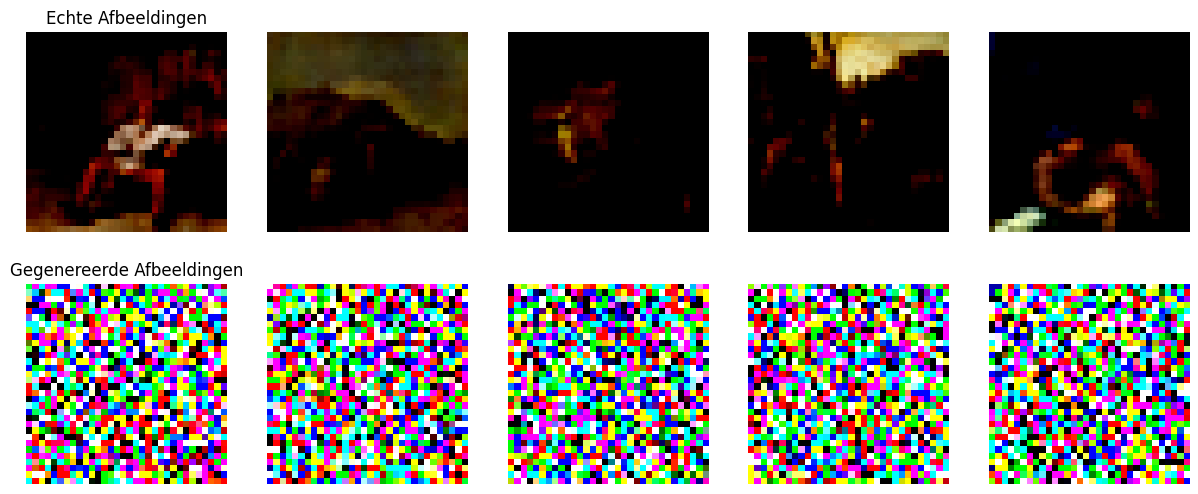

In [19]:
generated_samples = sample(model, shape=(5, 32, 32, 3))
compare_generated_vs_real(generated_samples, dataset_128[:5])

- [Chat GPT voor verbeteren van diffusion](https://chatgpt.com/c/67d9c8f9-6410-8000-94a6-6dc0743076da)
- [Git met Diffusion Model](https://github.com/dome272/Diffusion-Models-pytorch/blob/main/ddpm.py)